# Computer assignment 4 
## Kasra Hajiheidari 810199400

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

## Part1: General data structure

In [2]:
marketing_data = pd.read_csv("./marketing_campaign.csv")
# print(marketing_data.to_string())
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

### Describe() method:
- count - The number of not-empty values. 
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

In [3]:
marketing_data.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


## Part2: Data misses

In [4]:
for i in range(1, marketing_data.shape[1]):
    print(marketing_data.columns[i] + ":")
    # miss_number = marketing_data.shape[0] - marketing_data.count().iloc[i]
    miss_number = np.count_nonzero(marketing_data[marketing_data.columns[i]].isnull().values)
    print("\tLoss number:", miss_number, ", Percentage:", miss_number/marketing_data.shape[0]*100,"%")


ID:
	Loss number: 0 , Percentage: 0.0 %
Year_Birth:
	Loss number: 0 , Percentage: 0.0 %
Education:
	Loss number: 0 , Percentage: 0.0 %
Marital_Status:
	Loss number: 0 , Percentage: 0.0 %
Income:
	Loss number: 223 , Percentage: 9.955357142857142 %
Kidhome:
	Loss number: 0 , Percentage: 0.0 %
Teenhome:
	Loss number: 0 , Percentage: 0.0 %
Dt_Customer:
	Loss number: 0 , Percentage: 0.0 %
Recency:
	Loss number: 0 , Percentage: 0.0 %
MntCoffee:
	Loss number: 205 , Percentage: 9.151785714285714 %
MntFruits:
	Loss number: 0 , Percentage: 0.0 %
MntMeatProducts:
	Loss number: 0 , Percentage: 0.0 %
MntFishProducts:
	Loss number: 0 , Percentage: 0.0 %
MntSweetProducts:
	Loss number: 0 , Percentage: 0.0 %
MntGoldProds:
	Loss number: 13 , Percentage: 0.5803571428571429 %
NumWebVisitsMonth:
	Loss number: 200 , Percentage: 8.928571428571429 %
Complain:
	Loss number: 0 , Percentage: 0.0 %
NumPurchases:
	Loss number: 0 , Percentage: 0.0 %
UsedCampaignOffer:
	Loss number: 0 , Percentage: 0.0 %


## Part3: Correlation diagram

In [5]:
df = pd.get_dummies(marketing_data, columns=['Education', 'Marital_Status'])

df["enrollment_date"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
current_date = datetime.now()
df['days_since_enrollment'] = (current_date - df['enrollment_date']).dt.days
df['months_since_enrollment'] = ((current_date - df['enrollment_date']).dt.days) // 30
df.pop("enrollment_date")
df.pop("Dt_Customer")
df.pop("Unnamed: 0")
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,days_since_enrollment,months_since_enrollment
ID,1.000000,0.000028,0.015702,0.003254,-0.002580,-0.046524,-0.020890,0.004600,-0.004437,-0.024475,...,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029,-0.000240,-0.002457
Year_Birth,0.000028,1.000000,-0.161613,0.218619,-0.352111,-0.019871,-0.174639,-0.017917,-0.030872,-0.041625,...,0.015455,0.012819,-0.071774,0.051193,0.116978,-0.052258,-0.161370,0.010465,0.022431,0.021812
Income,0.015702,-0.161613,1.000000,-0.399894,0.020794,-0.000913,0.558439,0.421018,0.571929,0.429283,...,0.011504,-0.012859,0.011652,-0.008567,-0.029285,0.014459,0.037027,-0.004768,-0.020885,-0.020125
Kidhome,0.003254,0.218619,-0.399894,1.000000,-0.025655,0.015477,-0.478746,-0.352588,-0.418982,-0.365663,...,-0.023232,0.036524,-0.014568,0.004255,0.024684,0.010835,-0.068361,-0.023232,-0.052233,-0.052886
Teenhome,-0.002580,-0.352111,0.020794,-0.025655,1.000000,0.016198,0.015004,-0.176764,-0.261160,-0.204187,...,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112,0.017465,0.017452
Recency,-0.046524,-0.019871,-0.000913,0.015477,0.016198,1.000000,0.024119,-0.004306,0.023056,0.001079,...,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603,0.024522,0.027179
MntCoffee,-0.020890,-0.174639,0.558439,-0.478746,0.015004,0.024119,1.000000,0.377859,0.560329,0.398729,...,0.004765,-0.013616,0.024071,-0.016864,-0.021491,0.005233,0.041808,0.001651,0.170687,0.170865
MntFruits,0.004600,-0.017917,0.421018,-0.352588,-0.176764,-0.004306,0.377859,1.000000,0.543105,0.594804,...,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518,0.066928,0.066880
MntMeatProducts,-0.004437,-0.030872,0.571929,-0.418982,-0.261160,0.023056,0.560329,0.543105,1.000000,0.568402,...,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492,0.092713,0.092093
MntFishProducts,-0.024475,-0.041625,0.429283,-0.365663,-0.204187,0.001079,0.398729,0.594804,0.568402,1.000000,...,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350,0.080769,0.081953


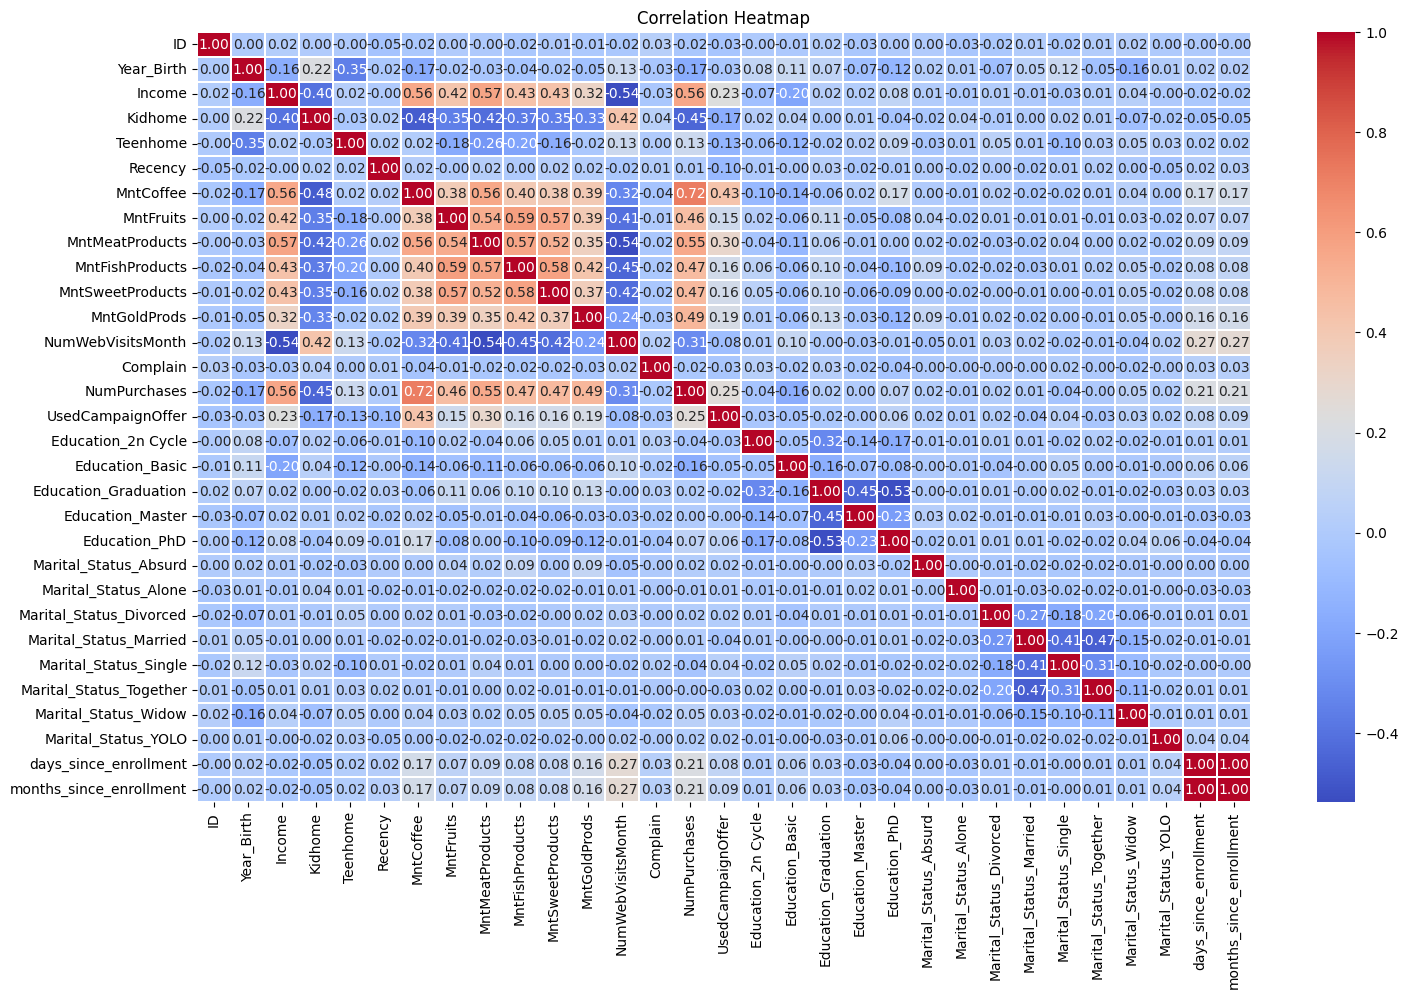

In [6]:
plt.figure(figsize=(17, 10))
sn.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=.1)
plt.title('Correlation Heatmap')
plt.show()

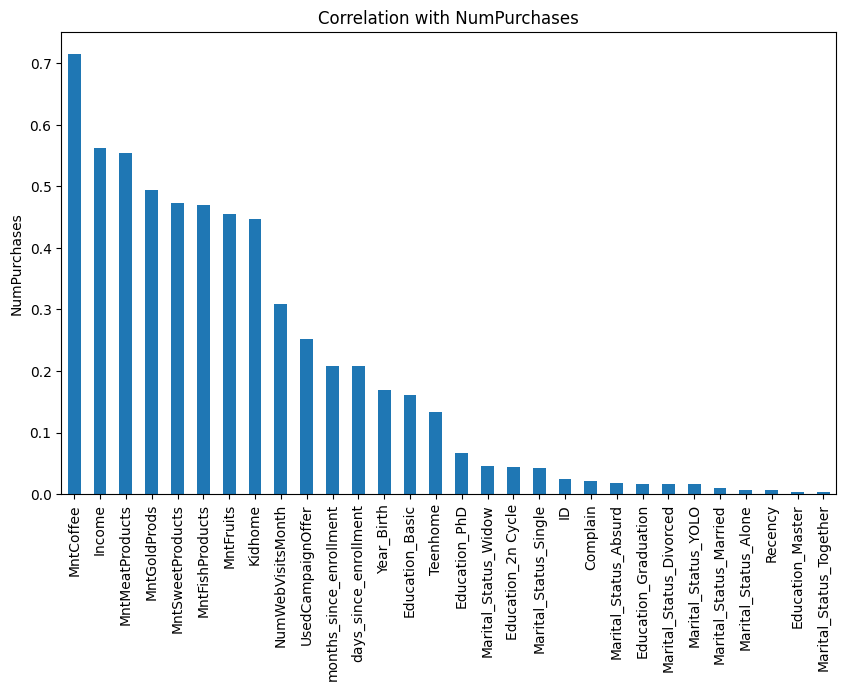

In [7]:
corr_res = df.corr()
correlation_purchases = corr_res["NumPurchases"].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_purchases.drop("NumPurchases").plot(kind = "bar")
plt.title("Correlation with NumPurchases")
plt.ylabel("NumPurchases")
plt.show()

## Part4 Best features

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'MntCoffee'}>,
        <Axes: title={'center': 'MntFruits'}>],
       [<Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumPurchases'}>, <Axes: >]], dtype=object)

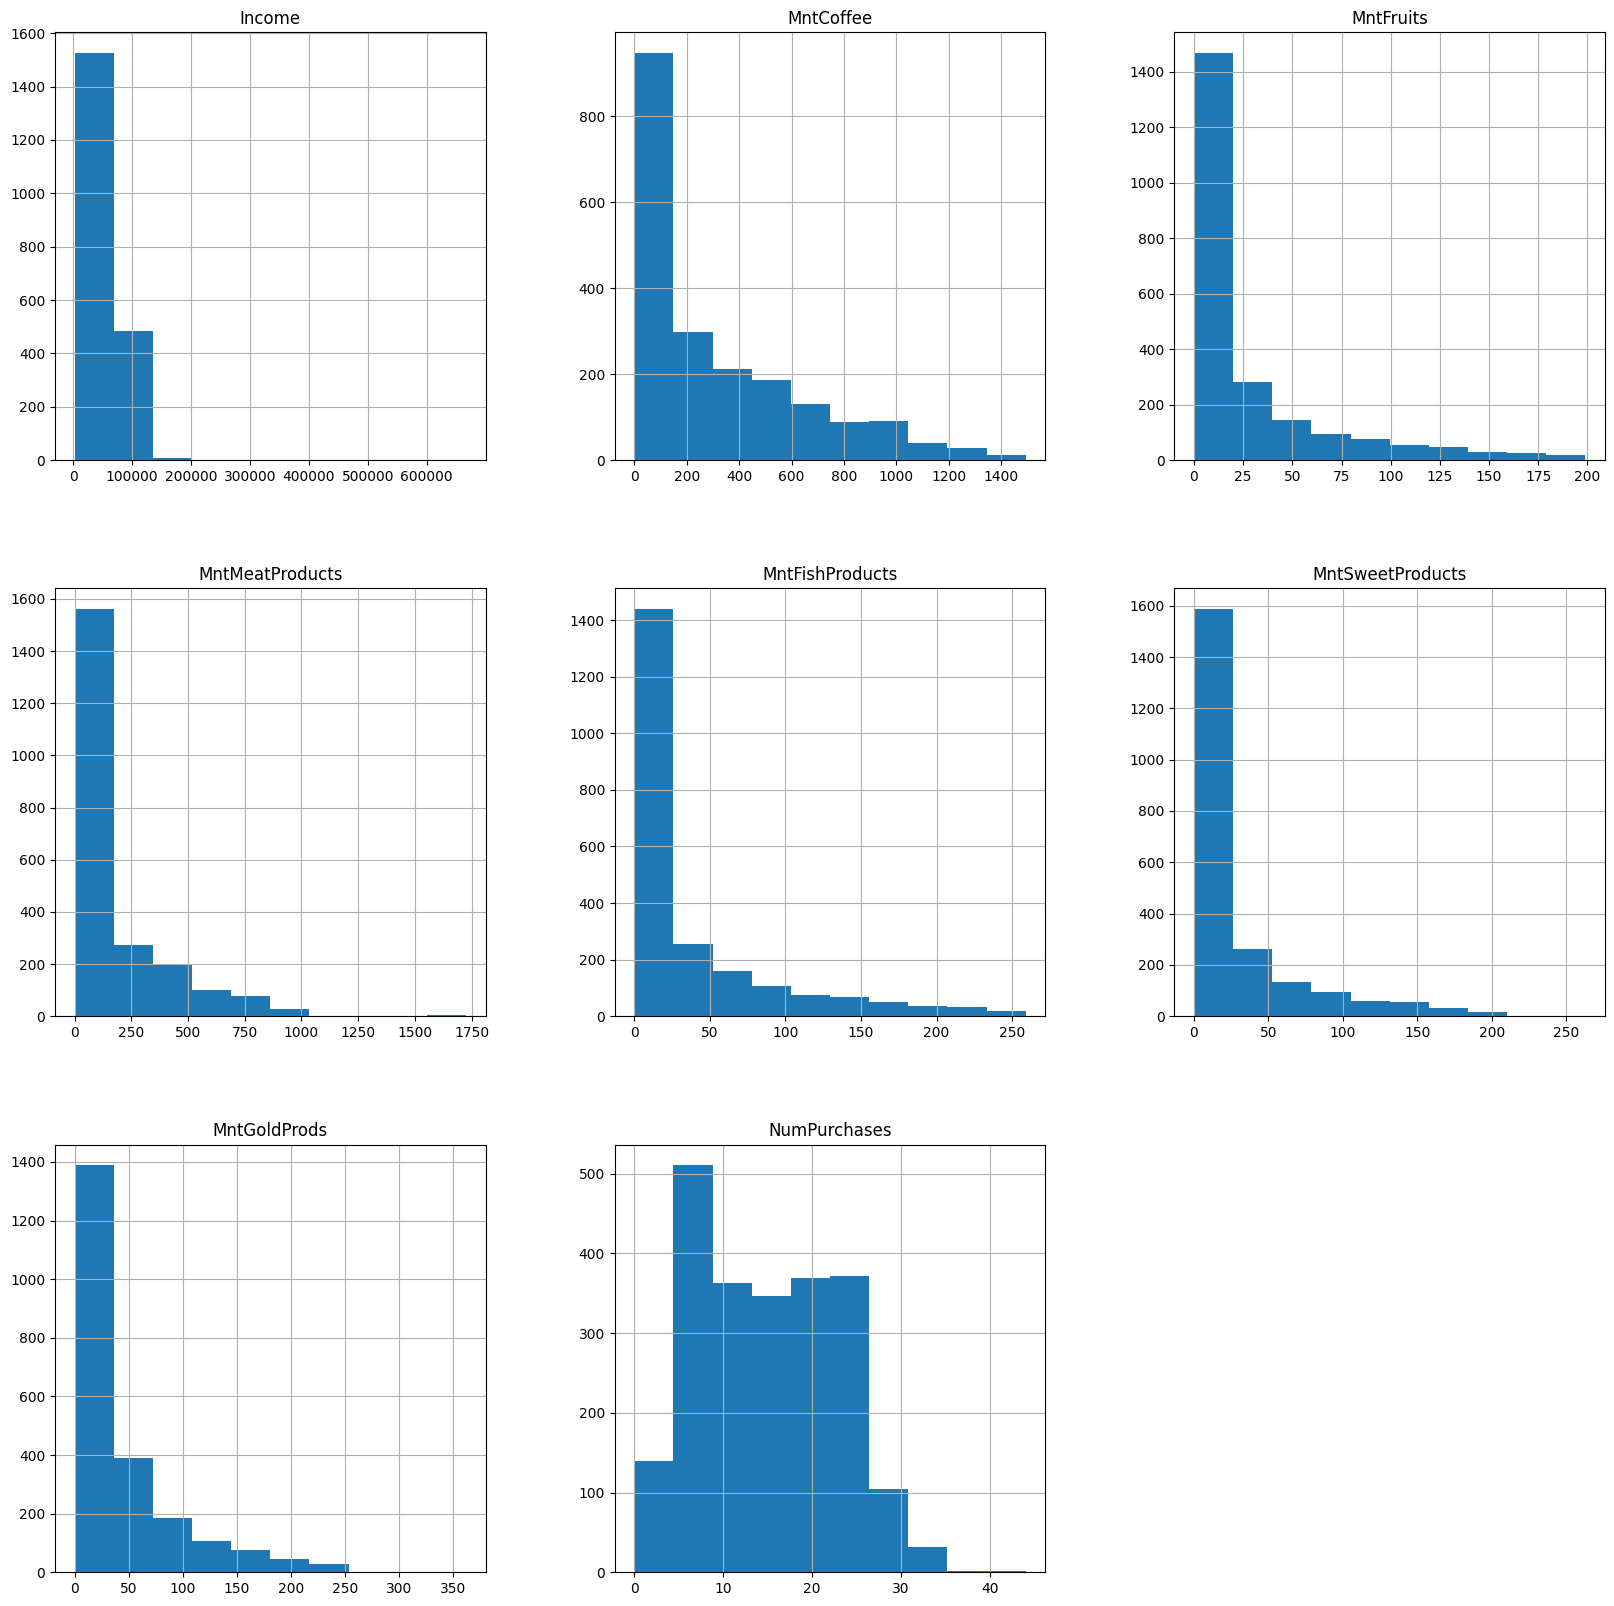

In [8]:
best_feats = df.__deepcopy__()
# best_feats.pop("NumPurchases")
for attr in corr_res.columns:
    if corr_res["NumPurchases"][attr] < 0.4:
        best_feats.pop(attr)
best_feats.hist(figsize=(20, 20))

## Part5: Hexbin and scatter diagrams

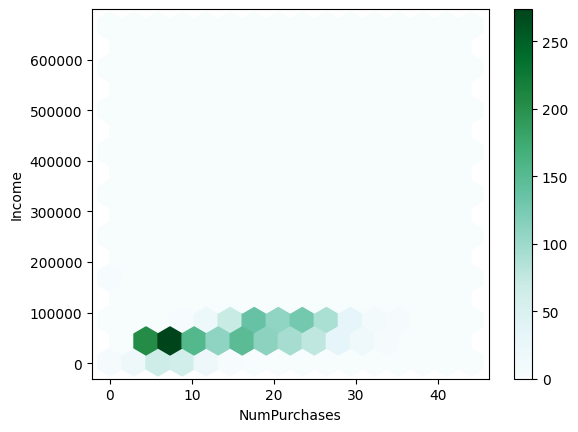

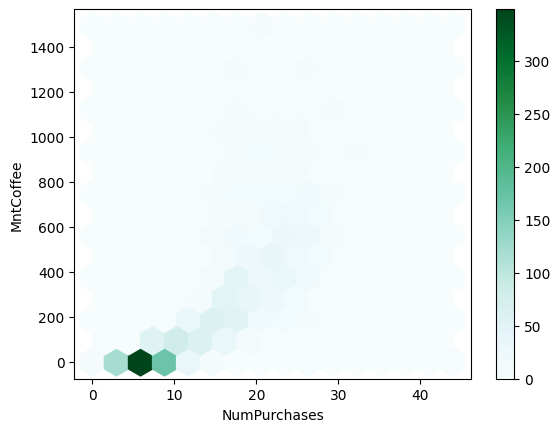

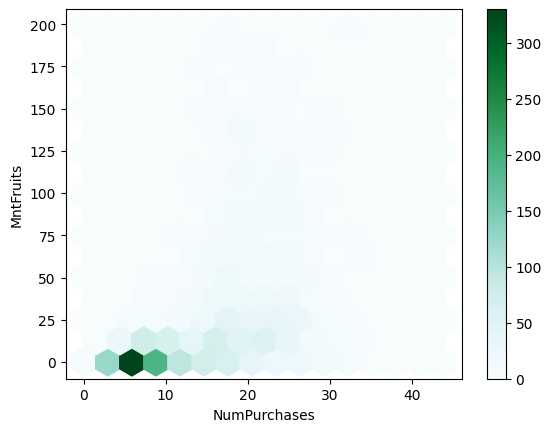

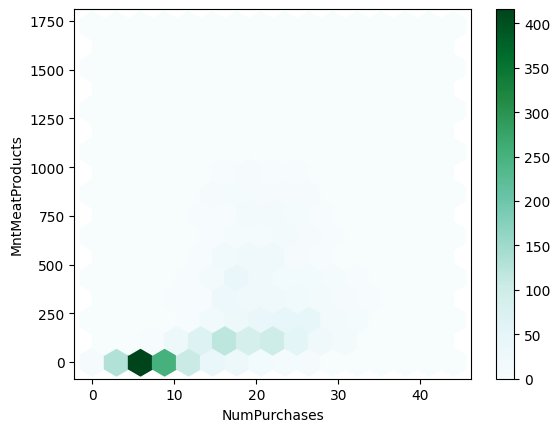

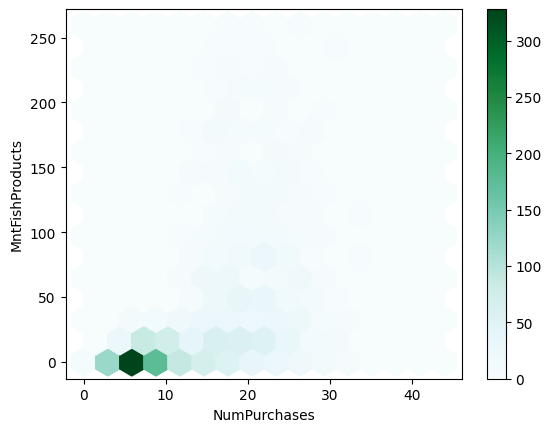

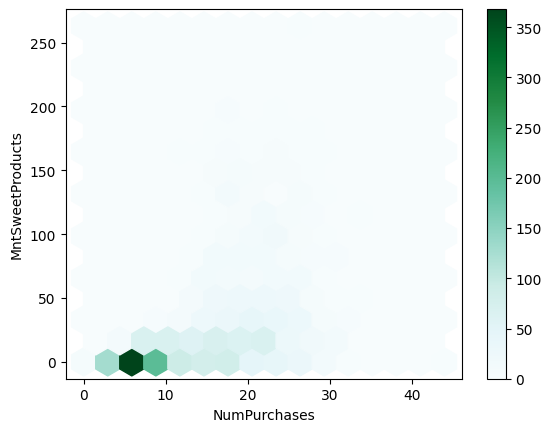

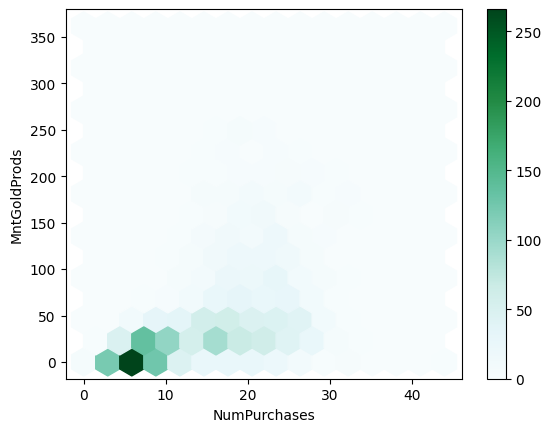

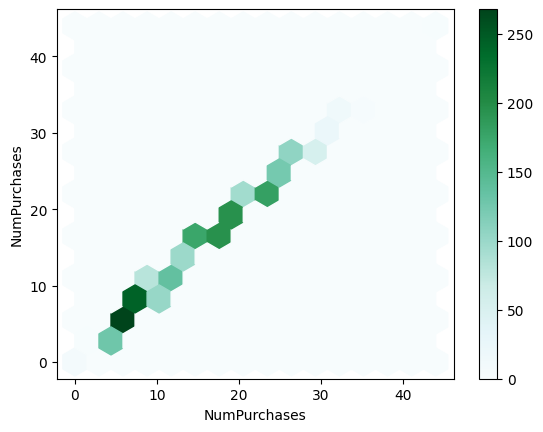

In [9]:
for feature in best_feats:
   best_feats.plot.hexbin(x = "NumPurchases", y = feature, gridsize = 15)

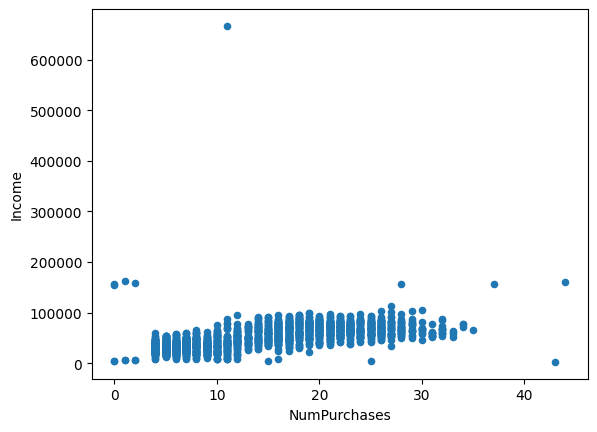

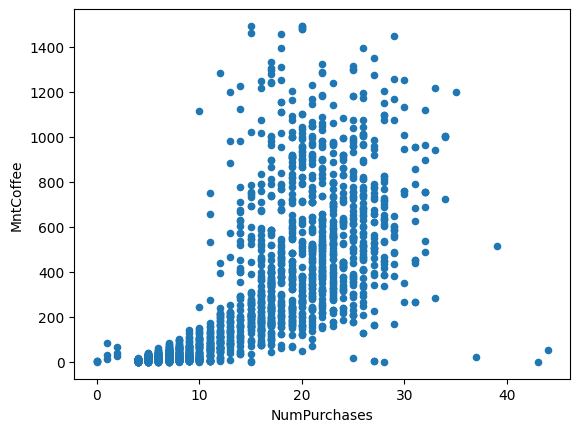

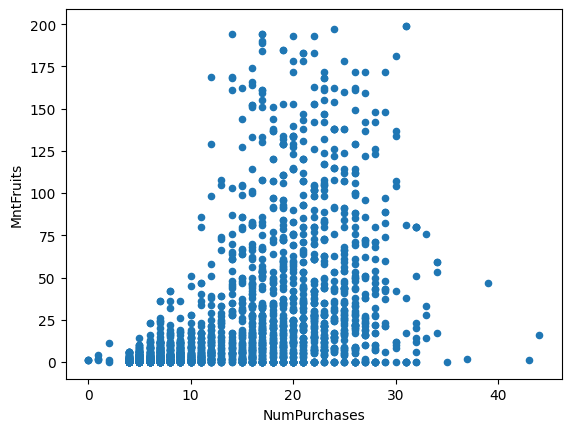

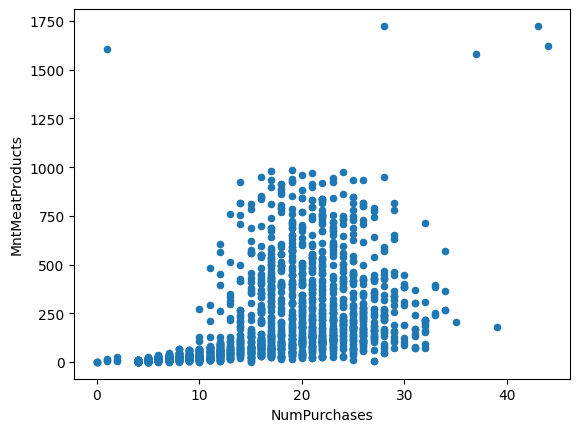

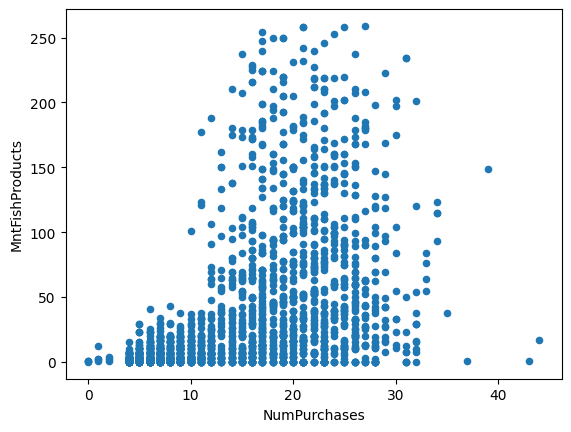

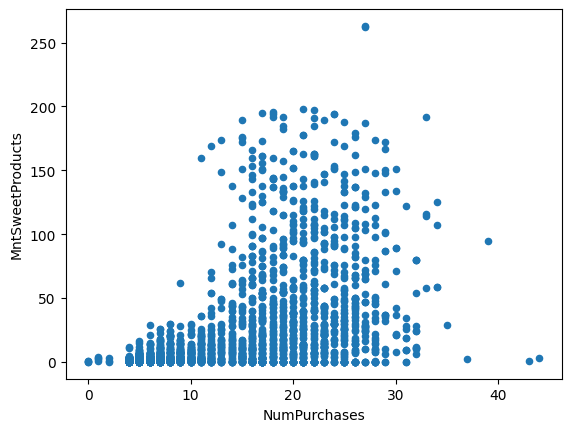

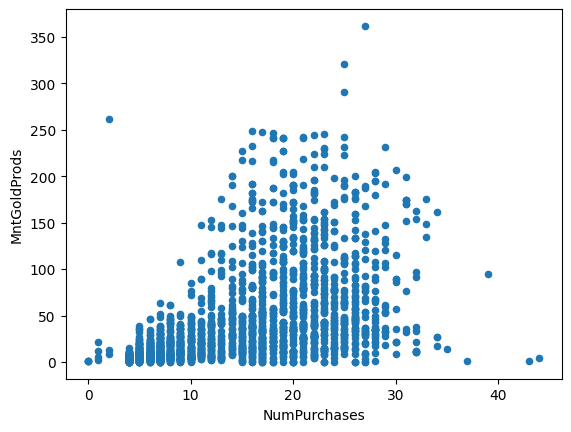

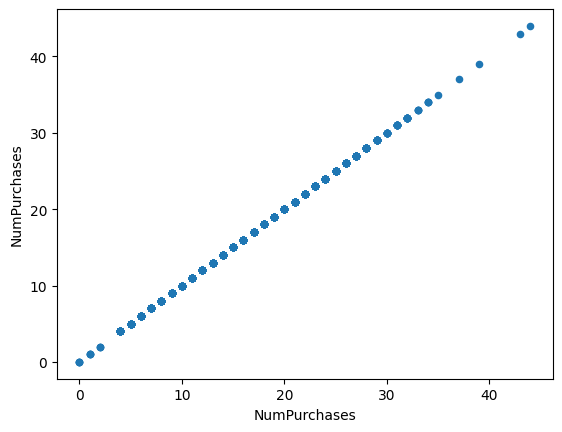

In [10]:
for feature in best_feats:
   best_feats.plot.scatter(x = "NumPurchases", y = feature)

## Part7: Missing values
Handling missing values in a dataset is a crucial step in the data preprocessing phase. The appropriate method for handling missing values depends on the nature of your data and the specific context of your analysis. Here are some common strategies for dealing with missing values in Python using pandas:

1. **Remove Rows with Missing Values:**
   - If the number of missing values is small, you may choose to simply remove the rows with missing values but it may lead to a loss of valuable data.

2. **Impute with a Constant Value:**
   - You can fill missing values with a constant, such as zero.This approach is suitable when missing values can be reasonably replaced with a specific constant.

3. **Impute with Mean, Median, or Mode:**
   - Fill missing values with the mean, median, or mode of the respective columns.We have to choose the appropriate measure (mean, median, or mode) based on the distribution of your data.

4. **Forward Fill or Backward Fill:**
   - Use forward fill or backward fill to propagate the previous or next value to fill missing values.This is suitable when missing values occur in sequences.

5. **Interpolation:**
   - Interpolate missing values based on the values of adjacent data points.This is useful when missing values follow a pattern.

6. **Using k-Nearest Neighbors (k-NN):**
   - Using k-Nearest Neighbors (k-NN) for imputing missing values is another approach, especially when you want to predict missing values based on the values of other features in your dataset.KNN imputation involves predicting the missing values based on the values of their k-nearest neighbors in the feature space. one of benefit is Does not make strong assumptions about the underlying data distribution.also it preserves local patterns.  
but it an be computationally expensive, especially for large datasets  and the choice of the number of neighbors (k) can impact the imputation results.


Also we can train a machine learning model to predict missing values based on other features in the dataset.
We have to choose the method that best fits our data and the goals of our analysis. It's often a good idea to visualize the distribution of missing values before deciding on a strategy. Also the choice of method can impact the results of our analysis.

## Part8: Fixing missing values

In [11]:
for feat in best_feats:
    col_mean = best_feats.loc[:, feat].mean()
    for data in range(len(best_feats.loc[:, feat])):
        if pd.isnull(best_feats.loc[data, feat]):
            best_feats.loc[data, feat] = col_mean
best_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2240 non-null   float64
 1   MntCoffee         2240 non-null   float64
 2   MntFruits         2240 non-null   int64  
 3   MntMeatProducts   2240 non-null   int64  
 4   MntFishProducts   2240 non-null   int64  
 5   MntSweetProducts  2240 non-null   int64  
 6   MntGoldProds      2240 non-null   float64
 7   NumPurchases      2240 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 140.1 KB


## Part9 : Normalizing and Standardizing
Normalizing and standardizing are two common techniques used in data preprocessing to scale and transform features in a dataset. Both techniques aim to bring the numerical features of the dataset to a similar scale, which can be important for certain machine learning algorithms. However, they have different methods of achieving this scaling.

1. **Normalizing:**
   - Normalizing is the process of scaling the values of a column to a range between 0 and 1. This is done by subtracting the minimum value of the column from each value, and then dividing by the range of the column (i.e., the difference between the maximum and minimum values). Normalizing is useful when the absolute values of the data are not important, but the relative values are.

    $$  \text{Normalized Value} = \frac{\text{Original Value} - \text{Min Value}}{\text{Max Value} - \text{Min Value}}  $$

   - The result is that all values in the feature will lie between 0 and 1.

   - The scikit-learn library provides the `MinMaxScaler` for normalizing data:

2. **Standardizing:**
   - Standardizing: Standardizing is the process of scaling the values of a column to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the column from each value, and then dividing by the standard deviation of the column. Standardizing is useful when the absolute values of the data are important, and when the data has a normal distribution.

    $$ \text{Standardized Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}} $$

   - The result is that the standardized values have a mean of 0 and a standard deviation of 1.

   - The scikit-learn library provides the `StandardScaler` for standardizing data:

**When to use each:**

- Use **normalization** when:
  - The features have a bounded range.
  - The algorithm you are using relies on the assumption that the features are on a similar scale.

- Use **standardization** when:
  - The features have different units or significantly different ranges.
  - The algorithm you are using assumes that the features are normally distributed.


**Why do we need them:**

- Different scales: The features in a DataFrame may have different scales, which can cause some features to dominate the others in the analysis. For example, if one feature has values in the range of 0-1 and another feature has values in the range of 0-1000, the second feature will have a much larger impact on the analysis. Normalizing or standardizing the data can ensure that all features have a similar scale and prevent this issue.

- Outliers: Outliers in the data can also have a significant impact on the analysis. Normalizing or standardizing the data can reduce the impact of outliers by scaling the data to a more reasonable range.

- Algorithm requirements: Some machine learning algorithms require the data to be normalized or standardized in order to work properly. For example, algorithms that use distance measures, such as k-nearest neighbors or clustering algorithms, can be sensitive to the scale of the data. Normalizing or standardizing the data can ensure that these algorithms work properly.

- Interpretability: Normalizing or standardizing the data can make the results of the analysis more interpretable. For example, if the data is standardized to have a mean of 0 and a standard deviation of 1, the coefficients of a linear regression model will represent the change in the response variable for a one standard deviation change in the predictor variable.

In [12]:
for feat in best_feats:
    if feat != "NumPurchases":
        # best_feats.loc[:, feat] = (best_feats.loc[:, feat] - best_feats[feat].min()) / (best_feats[feat].max() - best_feats[feat].min())  
        best_feats.loc[:, feat] /= best_feats.loc[:, feat].sum()

## Part10: 
There are different type of encoding object or string values such as following:

- Label Encoding: This method assigns a unique integer label to each category in the data. This is useful when the categories have an inherent order or ranking, such as low, medium, and high. The LabelEncoder class from the sklearn.preprocessing module can be used to perform label encoding.

- One-Hot Encoding: This method creates a binary column for each category in the data, indicating whether the category is present or not. This is useful when the categories do not have an inherent order or ranking, and when the number of categories is small. The get_dummies() function from Pandas can be used to perform one-hot encoding.

- Binary Encoding: This method creates binary columns for each category in the data, but instead of using a single binary column for each category, it uses a binary code for each category. This is useful when the number of categories is large, as it reduces the number of columns needed for encoding. The BinaryEncoder class from the category_encoders library can be used to perform binary encoding.

- Count Encoding: This method replaces each category in the data with the number of times it appears in the dataset. This is useful when the frequency of each category is important, and when the number of categories is large. The CountEncoder class from the category_encoders library can be used to perform count encoding.

- Target Encoding: This method replaces each category in the data with the mean of the target variable for that category. This is useful when the relationship between the categories and the target variable is important, and when the number of categories is large. The TargetEncoder class from the category_encoders library can be used to perform target encoding.

## Part11:
We can remove collumns that have huge data misses or they are not correlate and relevant with target collumn.(like Dt_Customer)

## Part12: Train and test:
- The training set is a subset of the available data that is used to train the machine learning model. The model is trained on the input features (also known as predictors or independent variables) and the corresponding output values (also known as labels or dependent variables) in the training set. The goal of training is to learn a mapping between the input features and the output values, so that the model can make accurate predictions on new, unseen data.

- The test set is a subset of the available data that is used to evaluate the performance of the machine learning model. The model is applied to the input features in the test set to make predictions, and the predicted output values are compared to the actual output values in the test set. The performance of the model is then evaluated using various metrics, such as accuracy, precision, recall, F1 score, etc.

Some ways:
- Random Split
- Stratified Split
- K-Fold Cross Validation


In [13]:
train_data, test_data = train_test_split(best_feats, test_size = 0.1)

## Part13: Validation
Validation in data refers to the process of evaluating the performance of a machine learning model on a dataset that is separate from the training dataset. The purpose of validation is to estimate how well the model will perform on new, unseen data. There are several types of validation techniques that can be used in machine learning, including:

- Holdout validation: This technique involves splitting the dataset into two parts: a training set and a validation set. The model is trained on the training set and evaluated on the validation set. The performance on the validation set is used to estimate the performance on new, unseen data.

- Cross-validation: This technique involves splitting the dataset into k-folds, where k is a user-defined parameter. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold used as the validation set once. The performance on the k validation sets is averaged to estimate the performance on new, unseen data.

- Leave-one-out validation: This technique involves using all but one data point for training and the remaining data point for validation. This process is repeated for each data point in the dataset. The performance on the validation sets is averaged to estimate the performance on new, unseen data.


## Part14: K-Fold Cross Validation

As said before, it is a resampling technique to assess the performance of a model. The dataset is divided into **k** subsets or folds, and the model is trained and evaluated k times. In each iteration, one of the k folds is used as the test set, while the remaining k-1 folds are used as the training set. This process is repeated k times, with each of the k folds used exactly once as the testing data. The performance metrics from each iteration are then averaged to provide a more robust estimate of the model's performance.

# Linear Regression
## Part15:

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [14]:
def simple_linear_regression(input_feature, output):
    x_mean = np.mean(input_feature)
    y_mean = np.mean(output)
    alpha = sum([(x - x_mean)*(y-y_mean) for x, y in zip(input_feature, output)]) / sum([(x - x_mean)**2 for x in input_feature])
    return alpha, y_mean - alpha * x_mean 

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [15]:
def get_regression_predictions(input_feature, slope, bias):
    return (np.dot(input_feature, slope) + np.add(input_feature, bias)).astype(int)

## Part16:
The feature with most correlation to the NumPurchases collumn gives us the most precision and as we seen before MntCoffe has the highest correlation with NumPurchases collumn.

In [16]:
for feat in train_data.drop("NumPurchases", axis=1):
    alpha, betha = simple_linear_regression(train_data.loc[:, feat], train_data.loc[:, "NumPurchases"])
    print(feat, ":", sum([(y - fx) ** 2 for y, fx in zip(train_data.loc[:, "NumPurchases"], get_regression_predictions(train_data.loc[:, feat], alpha, betha))]))

Income : 87664
MntCoffee : 65705
MntFruits : 95553
MntMeatProducts : 82809
MntFishProducts : 94231
MntSweetProducts : 93345
MntGoldProds : 92254


## Part17:
Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [17]:
def get_root_mean_square_error(predicted_values, outputs):
    return (sum([(y - fx)**2 for y, fx in zip(outputs, predicted_values)]) / len(outputs))**0.5

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [18]:
def get_r2_score(predicted_values, outputs):
    y_mean = outputs.mean()
    r2_score = 1 - (sum([(y - fx)**2 for y, fx in zip(outputs, predicted_values)]) / sum([(y - y_mean)**2 for y in outputs]))
    return r2_score

## Part18:
Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [19]:
designated_feature_list = [x for x in train_data if x != "NumPurchases"]

for feat in designated_feature_list:
    print("----------------------------------")
    alpha, betha = simple_linear_regression(train_data.loc[:, feat], train_data.loc[:, "NumPurchases"])
    print(feat)
    print("RMSE: ", end='')
    print(get_root_mean_square_error(get_regression_predictions(test_data.loc[:, feat], alpha, betha), test_data.loc[:, "NumPurchases"]))
    print("R2 score: ", end='')
    print(get_r2_score(get_regression_predictions(test_data.loc[:, feat], alpha, betha), test_data.loc[:, "NumPurchases"]))
print("----------------------------------")

----------------------------------
Income
RMSE: 5.711439023073408
R2 score: 0.38431075160094375
----------------------------------
MntCoffee
RMSE: 5.248724334812902
R2 score: 0.48003033367037407
----------------------------------
MntFruits
RMSE: 6.156805178012376
R2 score: 0.284546680148298
----------------------------------
MntMeatProducts
RMSE: 6.018943310202262
R2 score: 0.3162285136501517
----------------------------------
MntFishProducts
RMSE: 6.266050818270057
R2 score: 0.2589315807212673
----------------------------------
MntSweetProducts
RMSE: 6.296257391725432
R2 score: 0.25176946410515677
----------------------------------
MntGoldProds
RMSE: 6.233907854857749
R2 score: 0.2665149983147961
----------------------------------


# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [20]:
def predict_output(feature_matrix, weights, bias):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    # ToDo
    return np.dot(weights, feature_matrix) + bias

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [21]:
def feature_derivative(errors, feature):
    # ToDo
    return np.dot(np.dot(errors, feature), 2)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [22]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    # ToDo
    prev_cost = np.inf
    while(True):
        error = predict_output(feature_matrix, initial_weights, bias) - outputs
        nb = bias - 2 * step_size * np.sum(error) / len(outputs)
        weights = initial_weights - 2 * step_size * np.dot(feature_matrix, error) / len(outputs)
        bias = nb
        initial_weights = weights
        if abs(prev_cost - np.sum((error)**2)) < tolerance:
            break
        prev_cost = np.sum((error)**2)
    return weights, nb

In [23]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features: pd.DataFrame):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 5.e-5,
        'bias': 0
    }
    train_weights, bias = n_feature_regression(chosen_features, train_data.loc[:, "NumPurchases"], keywords)

    return chosen_features, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [24]:
sorted_feats = sorted(train_data.drop("NumPurchases", axis=1), key=lambda x: df.corr()["NumPurchases"][x], reverse=True)
sorted_feats_dataFrame = train_data.loc[:, sorted_feats]
chosen_features = None
chosen_features = train_data.loc[:, sorted_feats[0:2]].to_numpy()
chosen_mat, weight, bias = get_weights_and_bias(chosen_features.T)
# ToDo
# compute the chosen_feature_matrix, train_weights, and bias

In [40]:
print(len(chosen_features))
print(len(train_data.loc[:, "NumPurchases"]))

2016
2016


In [25]:
#ToDo
# compute the predictions
prdct = predict_output(test_data.loc[:, sorted_feats[0:2]].to_numpy().T, weight, bias)

In [26]:
#ToDo
# Calculate the R2 score and mean square error
# Explain the results
print("R2 Score:")
print("\t", get_r2_score(prdct, test_data.loc[:, "NumPurchases"]))
print("RMSE:")
print("\t", get_root_mean_square_error(prdct, test_data.loc[:, "NumPurchases"]))

R2 Score:
	 -0.00847756301748337
RMSE:
	 7.3096718334009765


## Three Feature Regression

Now repeat the steps for 3 features

In [27]:
# ToDo
chosen_features = None
chosen_features = train_data.loc[:, sorted_feats[0:3]].to_numpy()
chosen_mat, weight, bias = get_weights_and_bias(chosen_features.T)
prdct = predict_output(test_data.loc[:, sorted_feats[0:3]].to_numpy().T, weight, bias)
print("R2 Score:")
print("\t", get_r2_score(prdct, test_data.loc[:, "NumPurchases"]))
print("RMSE:")
print("\t", get_root_mean_square_error(prdct, test_data.loc[:, "NumPurchases"]))

R2 Score:
	 -0.008446462865552729
RMSE:
	 7.309559122089589


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [28]:
# ToDo
chosen_features = None
chosen_features = train_data.loc[:, sorted_feats[0:5]].to_numpy()
chosen_mat, weight, bias = get_weights_and_bias(chosen_features.T)
pred = predict_output(test_data.loc[:, sorted_feats[0:5]].to_numpy().T, weight, bias)
print("R2 Score:")
print("\t", get_r2_score(pred, test_data.loc[:, "NumPurchases"]))
print("RMSE:")
print("\t", get_root_mean_square_error(pred, test_data.loc[:, "NumPurchases"]))

R2 Score:
	 -0.008380753949499109
RMSE:
	 7.309320978048904


# Phase3:
## Part19:
At first we insert purhcaserate collumn. 

Decision Tree Accuracy:  88.83928571428571 %
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.91      0.88      0.89       120

    accuracy                           0.89       224
   macro avg       0.89      0.89      0.89       224
weighted avg       0.89      0.89      0.89       224

K-Nearest-Neighbors Accuracy:  90.625 %
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       104
           1       0.88      0.96      0.92       120

    accuracy                           0.91       224
   macro avg       0.91      0.90      0.90       224
weighted avg       0.91      0.91      0.91       224

Logistic Regression Accuracy:  46.42857142857143 %
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       104
           1       0.00      0.00      0.00       120

    accuracy                           0.46   

c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

<Axes: >

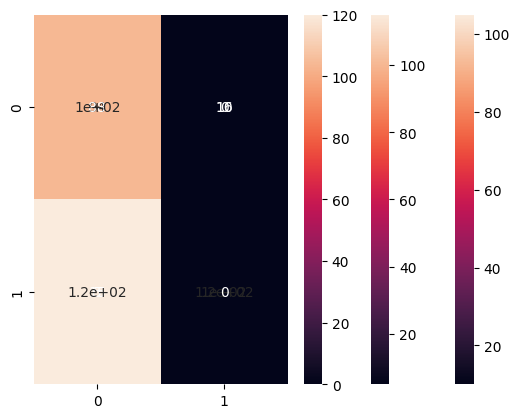

In [29]:
num_purchase_med = best_feats["NumPurchases"].median()
feat_copy = best_feats.copy()
feat_copy["PurchaseRate"] = (best_feats["NumPurchases"] > num_purchase_med) * 1
feat_copy = feat_copy.drop("NumPurchases", axis=1)
train_copy, test_copy = train_test_split(feat_copy, test_size=0.1)
target_test = test_copy.loc[:, "PurchaseRate"]
target_train = train_copy.loc[:, "PurchaseRate"]
temp = test_copy.pop("PurchaseRate")
temp = train_copy.pop("PurchaseRate")

#Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(train_copy, target_train)
tree_rate_pred = tree_classifier.predict(test_copy)
print("Decision Tree Accuracy: ",metrics.accuracy_score(target_test, tree_rate_pred) * 100, "%")
print(classification_report(target_test, tree_rate_pred))
sn.heatmap(confusion_matrix(target_test, tree_rate_pred),annot=True)

#K-Nearest-Neighbours
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(train_copy, target_train)
k_rate_pred = knn_classifier.predict(test_copy)
print("K-Nearest-Neighbors Accuracy: ", metrics.accuracy_score(target_test, k_rate_pred) * 100, "%")
print(classification_report(target_test, k_rate_pred))
sn.heatmap(confusion_matrix(target_test, k_rate_pred), annot=True)

#Logistic Regresion
lg_classifier = LogisticRegression()
lg_classifier.fit(train_copy, target_train)
lg_pred = lg_classifier.predict(test_copy)
print("Logistic Regression Accuracy: ",metrics.accuracy_score(target_test, lg_pred) * 100, "%")
print(classification_report(target_test, lg_pred))
sn.heatmap(confusion_matrix(target_test, lg_pred), annot=True)

## Part20: Grid Search

In [30]:
#Decision Tree
tree_pipe = Pipeline(steps=[('tree_classifier', tree_classifier)])
tree_param_grid = dict(
    tree_classifier__criterion = ['gini', 'entropy'],
    tree_classifier__max_depth = list(range(1, 14))
)  
grid_tree = GridSearchCV(tree_pipe, tree_param_grid, n_jobs=-1)
grid_tree.fit(train_copy, target_train)
print("Best Criterion:")
print(grid_tree.best_estimator_.get_params()['tree_classifier__criterion'])
print("Best Max Depth:")
print(grid_tree.best_estimator_.get_params()['tree_classifier__max_depth'])

#K-Nearest-Neighbours
knn_pipe = Pipeline(steps=[('knn_classifier', knn_classifier)])
knn_param_grid = dict(
    knn_classifier__n_neighbors = list(range(2, 40))
)  
grid_knn = GridSearchCV(knn_pipe, knn_param_grid, n_jobs=-1)
grid_knn.fit(train_copy, target_train)
print("Best Number of Neighbors:")
print(grid_knn.best_estimator_.get_params()['knn_classifier__n_neighbors'])

#Logistic Regresion
lg_pipe = Pipeline(steps=[('lg_classifier', lg_classifier)])
lg_param_grid = dict(
    lg_classifier__C = np.logspace(-4, 4, 50),
    lg_classifier__penalty = ['l1', 'l2'],
    lg_classifier__solver = ['saga', 'liblinear']
)
grid_lg = GridSearchCV(lg_pipe, lg_param_grid, n_jobs=-1)
grid_lg.fit(train_copy, target_train)
print("Best C:")
print(grid_lg.best_estimator_.get_params()['lg_classifier__C'])
print("Best Penalty:")
print(grid_lg.best_estimator_.get_params()['lg_classifier__penalty'])
print("Best Solver:")
print(grid_lg.best_estimator_.get_params()['lg_classifier__solver'])

Best Criterion:
entropy
Best Max Depth:
5
Best Number of Neighbors:
27
Best C:
6866.488450042998
Best Penalty:
l1
Best Solver:
liblinear


## Part22: Underfitting and Overfitting 
- Overfitting occurs when a model is too complex and fits the training data too closely. This means that the model has learned the noise in the training data, rather than the underlying patterns, and is not able to generalize well to new, unseen data. Overfitting can occur when the model has too many parameters relative to the amount of training data, or when the model is trained for too many iterations. Overfitting can be detected by evaluating the performance of the model on a separate test set, and comparing it to the performance on the training set. If the performance on the test set is significantly worse than the performance on the training set, then the model is likely overfitting.

- Underfitting occurs when a model is too simple and is not able to capture the underlying patterns in the data. This means that the model is not able to fit the training data well, and is not able to generalize well to new, unseen data. Underfitting can occur when the model has too few parameters relative to the complexity of the data, or when the model is trained for too few iterations. Underfitting can be detected by evaluating the performance of the model on the training set, and comparing it to the performance on the test set. If the performance on both the training set and the test set is poor, then the model is likely underfitting.

## Part23: Drawing Tree

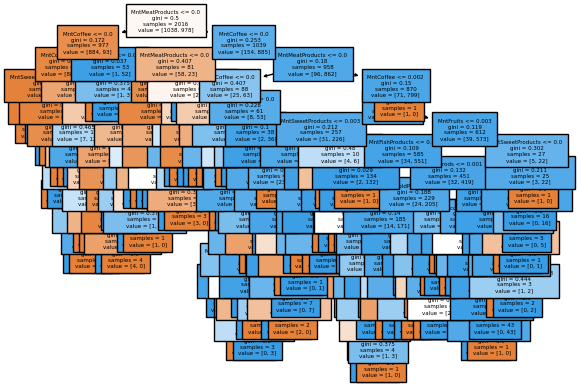

In [31]:
temp = plot_tree(tree_classifier, feature_names=feat_copy.columns, filled=True, fontsize=4)

# Ensemle learning
## Part24:
Random forest is a type of ensemble learning algorithm that is used for both classification and regression problems. It works by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The random forest algorithm works by randomly selecting a subset of the input features and a subset of the training data for each decision tree. This process is repeated for each decision tree in the forest, resulting in a set of diverse decision trees that are trained on different subsets of the data. The output of the random forest algorithm is the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The random forest algorithm has several advantages over a single decision tree. First, it is less prone to overfitting than a single decision tree, because the diversity of the decision trees in the forest reduces the risk of learning the noise in the data. Second, it can handle both categorical and numerical data, and can handle missing values and outliers. Third, it can provide estimates of feature importance, which can be used to identify the most important features for the classification or regression problem.

#### Hyper Parameters for Random Forest
- `n_estimator`:  The number of trees in the forest. Increasing this parameter can improve the performance of the model, but can also increase the risk of overfitting
-  `warm_start`: If `True`, allows addition of new trees to the forest iteratively.

-  `max_depth`: The maximum depth of each tree in the forest. Increasing this parameter can improve the performance of the model, but can also increase the risk of overfitting.

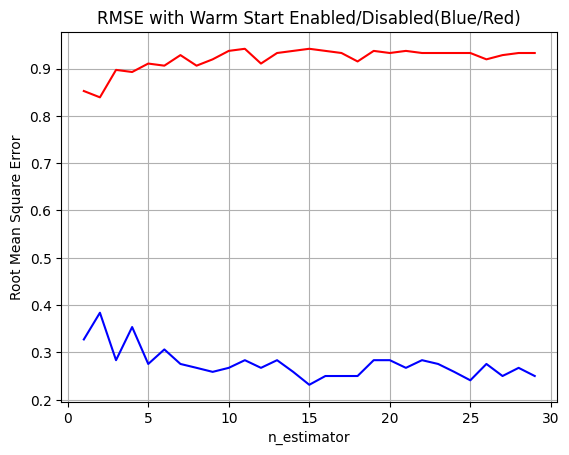

[0.32732683535398854, 0.38382473678936924, 0.2834733547569204, 0.3535533905932738, 0.27548658250966984, 0.30618621784789724, 0.27548658250966984, 0.2672612419124244, 0.25877458475338283, 0.2672612419124244, 0.2834733547569204, 0.2672612419124244, 0.2834733547569204, 0.25877458475338283, 0.23145502494313785, 0.25, 0.25, 0.25, 0.2834733547569204, 0.2834733547569204, 0.2672612419124244, 0.2834733547569204, 0.27548658250966984, 0.25877458475338283, 0.24090602791485788, 0.27548658250966984, 0.25, 0.2672612419124244, 0.25]
[0.8526785714285714, 0.8392857142857143, 0.8973214285714286, 0.8928571428571429, 0.9107142857142857, 0.90625, 0.9285714285714286, 0.90625, 0.9196428571428571, 0.9375, 0.9419642857142857, 0.9107142857142857, 0.9330357142857143, 0.9375, 0.9419642857142857, 0.9375, 0.9330357142857143, 0.9151785714285714, 0.9375, 0.9330357142857143, 0.9375, 0.9330357142857143, 0.9330357142857143, 0.9330357142857143, 0.9330357142857143, 0.9196428571428571, 0.9285714285714286, 0.9330357142857143

In [32]:
warm_res = []
no_warm_res = []
rf_warm_pred = None
for i in range(1, 30):
    rf_classifier_warm = RandomForestClassifier(warm_start=True, n_estimators=i)
    rf_classifier_warm.fit(train_copy, target_train)
    rf_warm_pred = rf_classifier_warm.predict(test_copy)
    warm_res.append(get_root_mean_square_error(rf_warm_pred, target_test))

    rf_classifier_no_warm = RandomForestClassifier(warm_start=False, n_estimators=i)
    rf_classifier_no_warm.fit(train_copy, target_train)
    rf_no_warm_pred = rf_classifier_no_warm.predict(test_copy)
    no_warm_res.append(metrics.accuracy_score(rf_no_warm_pred, target_test))
plt.xlabel("n_estimator")
plt.ylabel("Root Mean Square Error")
plt.title("RMSE with Warm Start Enabled/Disabled(Blue/Red)")
plt.plot([i for i in range(1, 30)], warm_res, color='blue')
plt.plot([i for i in range(1, 30)], no_warm_res, color='red')
plt.grid()
plt.show()
print(warm_res)
print(no_warm_res)

## Part25:
- Bias refers to the difference between the expected value of the predictions made by a machine learning model and the true values of the target variable. A model with high bias is one that is too simple and is not able to capture the underlying patterns in the data. This means that the model is not able to fit the training data well, and is not able to generalize well to new, unseen data. A model with high bias is said to be underfitting the data.

- Variance refers to the variability of the predictions made by a machine learning model for different training sets. A model with high variance is one that is too complex and fits the training data too closely. This means that the model has learned the noise in the training data, rather than the underlying patterns, and is not able to generalize well to new, unseen data. A model with high variance is said to be overfitting the data.

In [33]:
print("Decision Tree Report:")
print(classification_report(target_test, tree_rate_pred))
print("Random Forest Report:")
print(classification_report(target_test, rf_warm_pred))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.91      0.88      0.89       120

    accuracy                           0.89       224
   macro avg       0.89      0.89      0.89       224
weighted avg       0.89      0.89      0.89       224

Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.91      0.97      0.94       120

    accuracy                           0.94       224
   macro avg       0.94      0.93      0.94       224
weighted avg       0.94      0.94      0.94       224



# Differential Privacy
## Part26:
Adding noise to a dataset is a common technique used in privacy-preserving data analysis, particularly in the context of privacy-preserving machine learning and statistical analysis. The goal is to protect sensitive information in the dataset while still allowing for meaningful analysis. However, it's important to understand the potential effects and trade-offs of adding noise to a dataset for privacy.

Here are some key considerations:

 **Privacy Preservation:**
   - Adding noise helps protect individual privacy by making it more difficult to identify specific individuals in the dataset. This is particularly important when dealing with sensitive information, such as personal identifiers or health-related data.

 **Trade-off with Accuracy:**
   - Introducing noise inevitably affects the accuracy of the data. The added noise can lead to inaccuracies in statistical analyses, machine learning models, or other computations. The challenge is to strike a balance between privacy and maintaining the usefulness of the data for analysis.

 **Impact on Data Utility:**
   - The utility of the dataset, or its usefulness for analysis, may be compromised by the introduction of noise. The amount and type of noise added should be carefully chosen to minimize the impact on data utility while still providing sufficient privacy protection.

 **Type of Noise:**
   - The type of noise added (e.g., random noise, Laplace noise) can influence the trade-off between privacy and utility. Different types of noise have different statistical properties, and the choice depends on the specific use case and privacy requirements.

**Differential Privacy:**
   - Differential privacy is a rigorous framework for privacy preservation that involves adding carefully calibrated noise to the data. The goal is to ensure that the presence or absence of an individual's data does not significantly impact the outcome of any analysis. Differential privacy provides strong privacy guarantees but requires careful implementation and parameter tuning.

## Part27:
Laplace noise and exponential noise are both types of random noise that can be added to data for privacy-preserving purposes, particularly in the context of differential privacy. While they share some similarities, there are key differences between Laplace noise and exponential noise:
 **Use Cases:**
   - **Laplace Noise:** Laplace noise is often used in the context of differential privacy for adding privacy-preserving noise to data. It is suitable when you want a symmetric distribution with heavy tails.

   - **Exponential Noise:** Exponential noise can also be used for privacy-preserving purposes, but it is often applied in different scenarios. For example, it is commonly used in the Laplace mechanism for privacy-preserving data release.

In summary, Laplace noise and exponential noise are both used for privacy-preserving purposes, but Laplace noise is characterized by its symmetric distribution with heavy tails, while exponential noise is characterized by its skewed distribution with faster decaying tails. The choice between them depends on the specific requirements of the privacy-preserving application and the desired characteristics of the added noise.

## Part28: Adding noise to data
We use laplace Noise for privacy preserving.
This method has a simple implmentation and can be used on datasets that getting a precise information is not a priority, and only being in a acceptable range would suffice. If this was not the case, the _exponential_ mechanism should've been used.<br>
$$f(D)+Lap\binom{\Delta f}{\epsilon}$$
- $\Delta f$: sensivity of the function
- $\epsilon$: privacy parameter


In [34]:
def laplace_pr(x, epsilon, sensitivity):
    x += np.random.laplace(0, sensitivity/epsilon, 1)[0]
    return x
noisy_feat_train = train_copy.copy()
noisy_feat_test = test_copy.copy()
noisy_target_train = target_train.copy()
noisy_target_test = target_test.copy()

noisy_feat_test = noisy_feat_test.apply(laplace_pr, args=(0.1, 0.01), axis=1)
noisy_feat_train = noisy_feat_train.apply(laplace_pr, args=(0.1, 0.01), axis=1)
display(noisy_feat_train)
display(noisy_feat_test)

,Income,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1795,-0.016842,-0.017070,-0.017086,-0.017059,-0.017086,-0.017053,-0.016882
85,0.014626,0.014399,0.014510,0.014412,0.014493,0.014440,0.014405
807,0.002655,0.002420,0.002659,0.002547,0.002564,0.002233,0.002642
1419,-0.189067,-0.189248,-0.189226,-0.189234,-0.189277,-0.189211,-0.189267
1698,-0.038658,-0.038969,-0.039012,-0.039007,-0.039012,-0.039012,-0.039002
...,...,...,...,...,...,...,...
1306,-0.089015,-0.089054,-0.089342,-0.089308,-0.089349,-0.089345,-0.088792
167,0.169483,0.169347,0.169121,0.169124,0.169119,0.169036,0.169056
2191,-0.118457,-0.118772,-0.118789,-0.118787,-0.118806,-0.118740,-0.118561
1445,0.184940,0.184642,0.184955,0.184770,0.184830,0.185289,0.184558


,Income,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
390,0.071371,0.071472,0.072874,0.072702,0.070993,0.072811,0.071180
893,0.208070,0.207623,0.207623,0.207626,0.207718,0.207673,0.207643
120,0.244443,0.244433,0.244778,0.244319,0.244427,0.245151,0.244452
1903,0.117202,0.116960,0.116964,0.117011,0.116971,0.116964,0.116967
887,-0.024561,-0.024852,-0.024922,-0.024917,-0.024922,-0.024922,-0.024871
...,...,...,...,...,...,...,...
929,-0.010047,-0.009516,-0.009273,-0.009385,-0.010429,-0.010416,-0.009816
35,0.012849,0.012461,0.012403,0.012454,0.012427,0.012419,0.012433
306,0.058633,0.058188,0.058628,0.058253,0.058388,0.058566,0.058339
95,0.118892,0.118643,0.118686,0.118665,0.118778,0.118718,0.118727


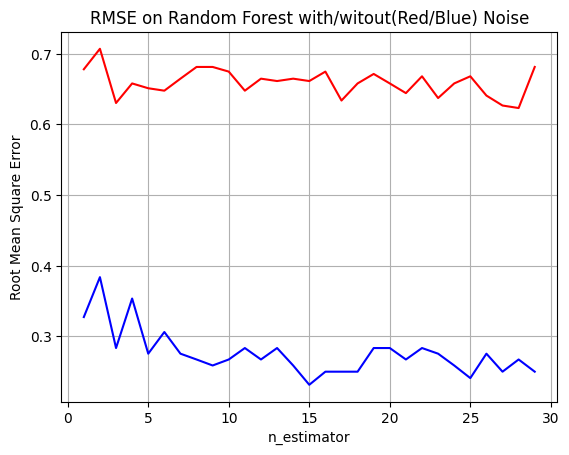

[0.32732683535398854, 0.38382473678936924, 0.2834733547569204, 0.3535533905932738, 0.27548658250966984, 0.30618621784789724, 0.27548658250966984, 0.2672612419124244, 0.25877458475338283, 0.2672612419124244, 0.2834733547569204, 0.2672612419124244, 0.2834733547569204, 0.25877458475338283, 0.23145502494313785, 0.25, 0.25, 0.25, 0.2834733547569204, 0.2834733547569204, 0.2672612419124244, 0.2834733547569204, 0.27548658250966984, 0.25877458475338283, 0.24090602791485788, 0.27548658250966984, 0.25, 0.2672612419124244, 0.25]
[0.6781013409302687, 0.7071067811865476, 0.6303343783829568, 0.6580544918817243, 0.6512350903146596, 0.6477984695434662, 0.6648039453209388, 0.6813851438692469, 0.6813851438692469, 0.674801558131828, 0.6477984695434662, 0.6648039453209388, 0.6614378277661477, 0.6648039453209388, 0.6614378277661477, 0.674801558131828, 0.6338656910463875, 0.6580544918817243, 0.6714855598915417, 0.6580544918817243, 0.6443435197381684, 0.6681531047810609, 0.6373774391990981, 0.6580544918817243

In [35]:
#to compare
warm_noisy_res = []
for i in range(1, 30):
    rf_warm_noisy = RandomForestClassifier(warm_start=True, n_estimators=i)
    rf_warm_noisy.fit(noisy_feat_train, target_train)
    rf_warm_noisy_pred = rf_warm_noisy.predict(noisy_feat_test)
    warm_noisy_res.append(get_root_mean_square_error(rf_warm_noisy_pred, target_test))

plt.xlabel("n_estimator")
plt.ylabel("Root Mean Square Error")
plt.title("RMSE on Random Forest with/witout(Red/Blue) Noise")
plt.plot([i for i in range(1, 30)], warm_res, color='blue')
plt.plot([i for i in range(1, 30)], warm_noisy_res, color='red')
plt.grid()
plt.show()
print(warm_res)
print(warm_noisy_res)

# Gradient Boosting
## Part29:
The gradient boosting algorithm works by iteratively adding decision trees to the ensemble, with each new tree attempting to correct the errors of the previous trees. The algorithm starts by fitting a simple model (e.g., a decision tree) to the data, and then calculates the residuals (i.e., the difference between the predicted values and the true values) of the model. The next model is then trained on the residuals of the previous model, with the goal of reducing the residuals and improving the overall performance of the ensemble. This process is repeated for a fixed number of iterations, or until the performance on the validation set stops improving.

The gradient boosting algorithm uses a technique called gradient descent to optimize the parameters of the weak learners. Gradient descent is an iterative optimization algorithm that works by computing the gradient of the loss function with respect to the parameters, and then updating the parameters in the direction of the negative gradient. This process is repeated until the loss function reaches a minimum.

## Part30:
XGBoost works through an iterative process of building an ensemble of weak learners, typically decision trees, and optimizing an objective function. Here's a step-by-step explanation of how XGBoost works:
   - Start with a simple model, often a shallow decision tree with a single leaf. This initial model predicts the mean or a constant value for all instances in the dataset.
   - Calculate the residuals (the differences between predicted and actual values) based on the initial model.
   - Fit a weak learner (decision tree) to the residuals. The tree is constructed by recursively partitioning the data based on features to minimize the residuals in each leaf.
   - Update the model predictions by adding the predictions from the newly built tree to the existing predictions.
   - Recalculate the residuals based on the updated predictions.
   - Define an objective function that combines a loss function and a regularization term. The loss function quantifies the difference between predicted and true values, while the regularization term controls the complexity of the model.
   - Optimize the objective function using gradient descent. Compute the gradient of the objective function with respect to the model's parameters (weights) and update the parameters in the direction that minimizes the gradient.
   - Repeat steps 3 to 6 for a specified number of iterations (boosting rounds) or until a stopping criterion is met.
   - Calculate feature importance based on the contribution of each feature to the model's predictions. Features that are frequently used in decision trees or contribute more to reducing the objective function are considered more important.
   - The final prediction is obtained by combining the predictions from all weak learners. This ensemble approach helps improve the model's overall performance and generalization ability.
    - Apply regularization techniques to control the complexity of individual trees, preventing overfitting.
    - Prune trees by removing branches that do not contribute significantly to the improvement of the model.
    - Implement early stopping to halt the training process when the model's performance on a validation dataset ceases to improve. This helps prevent overfitting.
    - The trained XGBoost model is then ready for making predictions on new, unseen data.

XGBoost's strength lies in its ability to handle complex relationships in data, manage overfitting through regularization, and optimize a diverse range of objective functions. The algorithm's efficiency is further enhanced by parallel and distributed computing capabilities, making it a powerful tool for various machine learning tasks.


## Part31:

In [36]:
xgb_train_dmat = xgb.DMatrix(train_copy, target_train, enable_categorical=True)
xgb_test_dmat = xgb.DMatrix(test_copy, target_test, enable_categorical=True)
xgb_params = {
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "device": "cuda"
}
xgb_model = xgb.train(params=xgb_params, dtrain=xgb_train_dmat, num_boost_round=100)
xgb_pred = xgb_model.predict(xgb_test_dmat)
get_root_mean_square_error(xgb_pred, target_test)

c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


0.2276711949630246

In [37]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(train_copy, target_train)
xgb_pipe = Pipeline(steps=[('xgb_classifier', xgb_classifier)])
xgb_param_grid = dict(
    xgb_classifier__max_depth = list(range(1, 10)),
    xgb_classifier__learning_rate = [0.01, 0.05, 0.1],
    xgb_classifier__device = ['cuda', None]
)
grid_xgb = GridSearchCV(xgb_pipe, xgb_param_grid, n_jobs=-1)
grid_xgb.fit(train_copy, target_train)
best_xgb_max_depth = grid_xgb.best_estimator_.get_params()['xgb_classifier__max_depth']
best_xgb_learning_rate = grid_xgb.best_estimator_.get_params()['xgb_classifier__learning_rate']
best_xgb_device = grid_xgb.best_estimator_.get_params()['xgb_classifier__device']
print("Best Max Depth: ",best_xgb_max_depth)
print("Best Learning Rate: ",best_xgb_learning_rate)
print("Best Device: ",best_xgb_device)

Best Max Depth:  6
Best Learning Rate:  0.05
Best Device:  cuda


c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [38]:
xgb_best_grid = XGBClassifier(max_depth=best_xgb_max_depth, device=best_xgb_device, learning_rate=best_xgb_learning_rate)
xgb_best_grid.fit(train_copy, target_train)
xgb_best_grid_pred = xgb_best_grid.predict(test_copy)

print("XGBoost with GridSearchCV:\n")
print("RMSE: ",get_root_mean_square_error(xgb_best_grid_pred, target_test))
print("R2 Score: ",get_r2_score(xgb_best_grid_pred, target_test))
print(classification_report(target_test, xgb_best_grid_pred))
print("----------------------------")
print("XGBoost without GridSearchCV:\n")
print("RMSE: ",get_root_mean_square_error(xgb_pred, target_test))
print("R2 Score: ",get_r2_score(xgb_pred, target_test))
print(classification_report(target_test, xgb_pred.round()))

c:\Users\Mr. Hajiheideri\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBoost with GridSearchCV:

RMSE:  0.27548658250966984
R2 Score:  0.6948717948717947
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       104
           1       0.90      0.97      0.93       120

    accuracy                           0.92       224
   macro avg       0.93      0.92      0.92       224
weighted avg       0.93      0.92      0.92       224

----------------------------
XGBoost without GridSearchCV:

RMSE:  0.2276711949630246
R2 Score:  0.7916000428489283
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       104
           1       0.92      0.97      0.94       120

    accuracy                           0.94       224
   macro avg       0.94      0.94      0.94       224
weighted avg       0.94      0.94      0.94       224

